# <font color = 'indianred'>**Sentiment Analysis with the IMDB Dataset using Pre-Trained model** </font>

**Objective:**

In this notebook,
(1) Learn to laod the datasets from Huggingface
(2) Do simple EDA and understand the data


**Plan**

1. Set Environment
2. Load Dataset
3. Accessing and Manipulating Splits




















# <font color = 'indianred'> **1. Setting up the Environment** </font>



In [1]:
!pip install datasets transformers -U -qq


<font color = 'indianred'> *Load Libraries* </font>

In [2]:
# standard data science librraies for data handling and v isualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset, DatasetDict
from pprint import pprint
from google.colab import userdata
from huggingface_hub import login


In [3]:
hf_token = userdata.get('HF_TOKEN')

In [4]:
if hf_token:
    # Log in to Hugging Face
    login(token=hf_token)
    print("Successfully logged in to Hugging Face!")
else:
    print("Hugging Face token not found in notebook secrets.")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful
Successfully logged in to Hugging Face!


# <font color = 'indianred'> **2. Load Data set**
    


**IMDB movie review dataset**

For this tutorial, we are using the *IMDB movie review dataset*, which is widely recognized for sentiment analysis tasks. It consists of movie reviews from the IMDB website.

- This is a dataset for binary sentiment classification i.e. it has two outputes (positive sentiment and negative sentiment). The dataset has a set of 25,000 movie reviews for training, and 25,000 for testing.

- The labels for this dataset are binary, reflecting positive or negative sentiments. A label of '0' typically represents a negative sentiment, while a label of '1' signifies a positive sentiment.

- The dataset can be accessed via the following link: http://ai.stanford.edu/~amaas/data/sentiment/

- Additionally, the dataset is conveniently available on the HuggingFace platform. For the purposes of this notebook, we'll source the data from HuggingFace.

**Shift in Preprocessing: From Custom Models to Pre-trained Models**

For this notebook, we will downaload the data from Huggingface and will not do any preprocessing. We will now explain you why we need to change our approach in this notebook.

In our previous notebooks, we focused on building custom models for NLP tasks, wherein a significant part of the process involved extensive preprocessing of the data. This included cleaning the text, normalizing it, and performing steps like stop-word removal, stemming, and lemmatization. We did this step and provided you with the processed text. The purpose was to reduce the complexity of the text data and manage the size of the vocabulary that our model would need to handle.

However, in our current approach, where we utilize pre-trained models from the Huggingface library, the preprocessing requirements differ significantly. Let's explore these differences and understand why certain preprocessing steps are no longer necessary:

1. **Built-in Tokenization and Normalization:**
   - Pre-trained models come with their own tokenizers. These tokenizers are designed to convert text into a specific format that the model understands. They handle tasks like splitting text into tokens, adding special tokens, and managing punctuation and case normalization. This reduces the need for manual text cleaning and normalization.

2. **Fixed, Comprehensive Vocabulary:**
   - Unlike custom models where we might limit vocabulary to manage model complexity and size, pre-trained models like BERT or GPT have a fixed and extensive vocabulary established during their pre-training on large text corpora. This pre-established vocabulary covers a broad range of words and contexts, making additional steps like stop-word removal or vocabulary trimming unnecessary.

3. **Advanced Handling of Out-of-Vocabulary Words:**
   - Pre-trained models often use sophisticated tokenization strategies (e.g., Byte-Pair Encoding, WordPiece) to effectively manage out-of-vocabulary words. This approach breaks down unknown words into known subwords, allowing the model to handle a wider range of words than those explicitly present in the vocabulary.

In summary, when moving from custom models to pre-trained models, the need fo preprocessing reduces significantly. We might in some cases still do some basic cleaning like removineg HTML tags, but we do not need extensive pre-processing. The advanced capabilities of pre-trained models, such as handling a vast range of vocabulary and understanding context, allow us to bypass some of the more traditional preprocessing steps.

In [5]:
imdb_dataset = load_dataset("imdb", trust_remote_code=True)

<font color = 'indianred'> *Understanding your data*

This section offers a hands-on introduction to working with Hugging Face datasets. It focuses on developing essential skills such as understanding the structure of datasets, effectively navigating and accessing data, and conducting initial data exploration and inspection.

In [6]:
print(imdb_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


- The Hugging Face dataset is structured similarly to a Python dictionary,
with each key corresponding to a different split such as training, testing, and validation.
- There are three primary splits in the IMDB dataset:train, test, unsupervised
- We can use the usual dictionary syntax to access individual splits, allowing for easy navigation and manipulation.


<font color = 'indianred'> *Understanding the datatype of columns*


In [7]:
imdb_dataset['train'].features


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

 Code Explanation:

 The code `imdb_dataset['train'].features` returns a description of the features (columns, fields, and their data types) present in the training split of the IMDB dataset.

 The `"text"` column is of `string` data type. It represents the movie review.

 The `"label`" column is described by a `ClassLabel` object, which contains information about the class names and their corresponding integer mappings. In this specific case, there are two class names: `'neg'` (negative) and `'pos'` (positive). These names would typically correspond to integer values, 0 for 'neg' and 1 for 'pos'.

<font color = 'indianred'> *Acess indivdual element* </font>

 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [8]:
# get the first example of the dataset
imdb_dataset['train'][0]



{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

We can see that single example is a dictioary with keys as column names. In this case we have two columns - text and label. The text is the text of the review and label tells the sentiment. Here label '0' means negative sentiment.

In [9]:
# extract the text of first example
first_example_text = imdb_dataset['train']['text'][0]
pprint(first_example_text , width=80)


('I rented I AM CURIOUS-YELLOW from my video store because of all the '
 'controversy that surrounded it when it was first released in 1967. I also '
 'heard that at first it was seized by U.S. customs if it ever tried to enter '
 'this country, therefore being a fan of films considered "controversial" I '
 'really had to see this for myself.<br /><br />The plot is centered around a '
 'young Swedish drama student named Lena who wants to learn everything she can '
 'about life. In particular she wants to focus her attentions to making some '
 'sort of documentary on what the average Swede thought about certain '
 'political issues such as the Vietnam War and race issues in the United '
 'States. In between asking politicians and ordinary denizens of Stockholm '
 'about their opinions on politics, she has sex with her drama teacher, '
 'classmates, and married men.<br /><br />What kills me about I AM '
 'CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. '
 "Really, 

In [10]:
# get label of last ten examples
imdb_dataset['train']['label'][-10:]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

<font color = 'indianred'> *Exploratory Data Analysis (EDA)* </font>

Having gained a preliminary understanding of our dataset's structure and content, it's time to dig deeper with Exploratory Data Analysis (EDA). EDA is a crucial step in any data science project, as it allows us to uncover patterns, spot anomalies, and make informed decisions about further steps.

In this section, we will focus on **two key aspects**:

1. **The distribution of class labels**

  Understanding class distribution is vital, especially in cases of imbalanced datasets, as it can significantly influence the choice of our model and approach. For instance, an imbalanced dataset might lead us to modify the loss function (recall cost sensitive learning we explored earlier).

2. **Length of reviews**

  The length of reviews is particularly important when working with pre-trained models. These models often have a limit on the number of tokens they can process. By analyzing the length distribution, we can strategize how to handle longer reviews. If most reviews exceed the model's token limit, we might need to consider alternative models or implement strategies like chunking. Conversely, if only a few reviews are longer, simple truncation might suffice.

Pandas, a powerful Python library for data manipulation and analysis, provides a wide range of tools and functions that simplify data manipulation, aggregation, and visualization, making it an ideal choice for these tasks. We will temporarily convert our Hugging Face dataset into a Pandas DataFrame for this analysis, taking advantage of Pandas' capabilities. After completing our EDA, we'll convert the data back to its original Hugging Face dataset format. This also shows the flexibility of Huggingafce Datasets and its compatibility with other popular data analysis libraries.



<font color = 'indianred'> *Change dataset format to Pandas*  </font>


In [11]:
# this will convert all the splits into Pandas dataframe
imdb_dataset.set_format(type='pandas')


In [12]:
# get all rows from tarining split
df_train = imdb_dataset['train'][:]


After setting the format to `pandas`, accessing the dataset with dictionary-style indexing (like imdb_dataset['train']) will return the data in the specified format. Here, the [:] is a slicing operation that retrieves all rows from the training split. Since you've set the format to 'pandas', df_train will be a pandas DataFrame containing all the reviews and labels from the training split of the IMDB dataset.

In [13]:
df_train.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [14]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


<font color = 'indianred'> *Visualize distribution of class labels* </font>

<Axes: ylabel='label'>

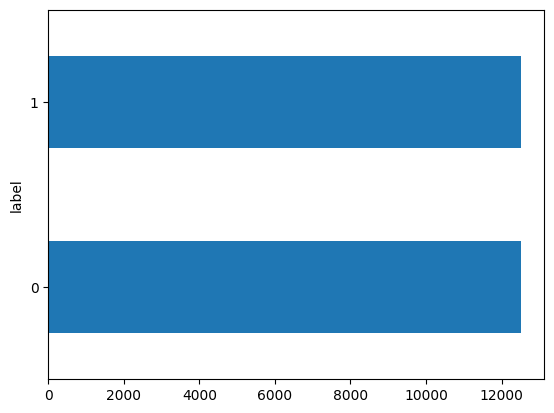

In [15]:
# check distribution of class labels in training dataset
df_train['label'].value_counts(ascending=True).plot.barh()


The code `df_train['label'].value_counts(ascending=True).plot.barh()` generates a horizontal bar plot to visualize the class label distribution in the 'label' column of the `df_train` DataFrame. It works as follows:

- `df_train['label']`: Selects the 'label' column.
- `.value_counts(ascending=True)`: Counts each unique value's occurrences, sorting them in ascending order.
- `.plot.barh()`: Creates a horizontal bar plot from these counts.

*We can see from the plot that the dataset is not imbalanced. Hence, we do not need to account for the imbalance in our loss function.*



<font color = 'indianred'> *Check length of the reviews* </font>

In [16]:
df_train['words_per_review'] = df_train['text'].str.split().apply(len)


The code df_train['text'].str.split().apply(len) calculates the number of words in each movie review within the df_train DataFrame.
- It first accesses the 'text' column of the DataFrame, which contains the movie reviews.
- Then, using the .str.split() method, each review is split into a list of words based on whitespace.
- The .apply(len) method is subsequently used to count the number of words in each of these lists.
- The resulting word counts are stored in a new column in the DataFrame called 'words_per_review'.

In [17]:
df_train.head()

,text,label,words_per_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311


<font color = 'indianred'> *Plot the distribution of review length* </font>

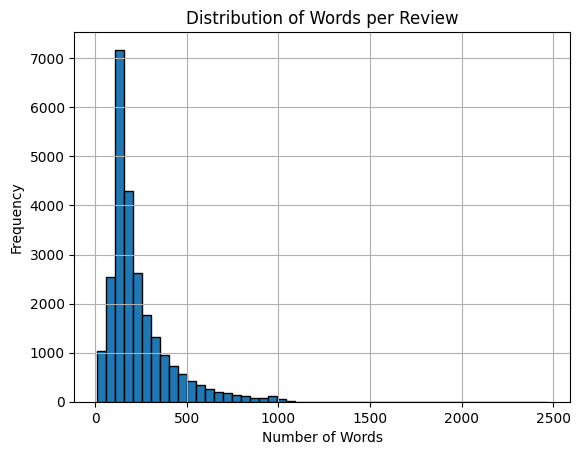

In [18]:
# Plot a histogram of the 'words_per_review' column
df_train['words_per_review'].hist(bins=50, edgecolor='black')

# Adding labels and a title for clarity
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Review')

# Display the plot
plt.show()


In [19]:
# We sill use BERT model for this notebook. The model has a  limit of 512 tokens
# On average, a rough estimate is that 512 tokens might translate to about 400 words
# Let us check how many reviews has more than 400 words

count = (df_train['words_per_review'] > 400).sum()
print(f"Number of reviews with more than 400 words: {count}")


Number of reviews with more than 400 words: 3353


In [20]:
335300/25000


13.412

From 25,000 reviews, only 3353 (around 13%) reviews have more than 400 words. Further, in classification, we can get reasonable accuarcey even if we truncate the review to 512 tokens. Hence, in this notebook, we will not implement advanced text handling techniques such as chunking or segmenting longer texts. Our focus will remain on utilizing BERT's capabilities for handling texts up to 512 tokens, which is adequate for the majority of our dataset. This approach simplifies the preprocessing stage and allows us to directly leverage BERT for the classification task.

<font color = 'indianred'>*Reset dataset format*</font>

After completing the Exploratory Data Analysis (EDA), we will no longer need the Pandas DataFrame. The next step will be tokenization. For this phase, we will use Tokenizer library from Hugging Face. Huggingface Tokenizer integrates seamlessly with Hugging Face datasets.Therefore, we will convert the dataset back to the Hugging Face dataset format.

In [21]:
imdb_dataset.reset_format()


In [22]:
imdb_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

# <font color = 'indianred'> **3. Accessing and Manuplating Splits**</font>

For training the model, we need training, validation, and test subsets. We can access the individual splits and further divide them to create these subsets. Additionally, we need to remove unwanted splits. Our approach is outlined below:

1. **Unsupervised Split Exclusion**:
   - In the IMDB dataset, we do not need the unsupervised split.
   - The unsupervised split does not have labels and is not useful for the text classification task.

2. **Test and Validation Splits**:
   - Extract the test split and further create two subdivisions - test and validation splits.
   - Use the validation split during training to tune hyperparameters.
   - Reserve the test split solely for final model evaluation.

3. **Combining Training and Validation Splits**:
   - We will combine the training split and validation split to create a combined dataset with two splits.
   - This is helpful as it streamlines the preprocessing steps, such as tokenization, by allowing us to apply the same function across the entire dataset efficiently. This unified approach also ensures consistency and reduces errors in data preparation.

4. **Separate Test Split for Real-world Emulation**:
   - Keep the test split separate to emulate a real-world scenario where the test dataset might be received separately.
   - This separation helps in validating the model's performance on an independent dataset.

5. **Creating Smaller Subsets for Efficiency**:
   - Using the full dataset can be time-consuming.
   - For efficiency in class demonstrations and initial experiments, we'll create smaller subsets.
   - These subsets allow for quick iterations and model testing before scaling up, ensuring a balance between practicality and exploration.

<font color = 'indianred'>*Extract Splits*

In [23]:
train_split = imdb_dataset['train']
test_validation_dataset = imdb_dataset["test"]


In [24]:
train_split

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

<font color = 'indianred'>*Create futher subdivions of the splits*</font>

In [25]:
# Split the test set into test and validation sets
test_val_splits = imdb_dataset["test"].train_test_split(
    test_size=0.5, seed=42)  # 50% for validation, 50% for test

# Extract the test and validation splits
valid_split = test_val_splits["train"]
test_split = test_val_splits["test"]


<font color = 'indianred'> *Create subset for experimentation* </font>

In [26]:
train_split_small = train_split.shuffle(seed=42).select(range(1000))
val_split_small = valid_split.shuffle(seed=42).select(range(200))
test_split_small = test_split.shuffle(seed=42).select(range(200))


<font color = 'indianred'>*Combine splits*</font>

We will combine train and validation splits as we will be applying the same processing steps to both the splits.


In [27]:
train_val_small = DatasetDict(
    {"train": train_split_small, "valid": val_split_small})

The code snippet creates a `DatasetDict` object named `train_val_dataset`, which is a special dictionary-like structure designed for managing datasets. Within this object, two key-value pairs are defined: "train" and "valid". The key "train" is associated with the `train_split_small` dataset, representing a subset or smaller version of the original training data. Similarly, the key "valid" is paired with the `val_split_small` dataset, signifying a subset or smaller version of the validation data. This structure allows for organized and efficient access to both the training and validation subsets, facilitating their use in subsequent data processing or machine learning tasks.

In [28]:
train_val_small

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1000
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
})

We have created the datset. The next step is to tokenize the dataset in a format so that we can pass the tokenized inputs to the pre-trained model.